In [8]:
import os

import pandas as pd
import matplotlib.pylab as plt
import pylab as mpl  #导入中文字体，避免显示乱码
import matplotlib.dates as mdate
import numpy as np
mpl.rcParams['font.sans-serif']=['SimHei']  #设置为黑体字

In [9]:
doc_path='./doc'
confimed_path=doc_path+'/confimed.csv'
cure_path=doc_path+'/cure.csv'
died_path=doc_path+'/died.csv'

missing_values = ["n/a", "na", "--"]

confime=pd.read_csv(confimed_path)
died=pd.read_csv(died_path)
cure=pd.read_csv(cure_path)

In [10]:
confime.index.size
confime.columns.size

876

In [121]:
def get_confime(city,model):
    confime_total=confime[confime['Country/Region']==city]
    if model=='confime'or model=='died':
        clip=-7
    elif model=='cure':
        clip=-311
    columns=confime_total.columns[4:clip].values
    loc=np.zeros((columns.size))
    total=confime_total.loc[:,columns].sum()
    return total.max()

[2099041.0, 29813848.0, 26493235.0, 1.0]


In [130]:
model='confime'
total_confime=5.3e+10
print('total_confime',total_confime)
city_list=['China', 'France', 'Germany','US']
citys=[]
for i in city_list:
    citys.append(get_confime(i,model))
print(citys)

total_confime 53000000000.0
[2099041.0, 29813848.0, 26493235.0, 84748884.0]


[2099041.0, 29813848.0, 26493235.0, 84748884.0]
['China', 'France', 'Germany', 'US']


<Figure size 720x720 with 0 Axes>

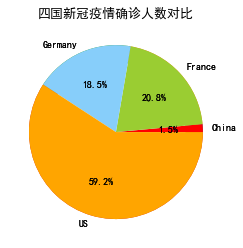

In [181]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(10,10))

# values=[i/total_confime for i in citys]
# values.append(1-sum(values))
values=citys
print(values)
print(city_list)
# values.append()
fig, ax = plt.subplots()
wedges, labels, autopct = ax.pie(citys,labels=city_list,
                                  autopct='%1.1f%%', wedgeprops=dict(width=.2))
colors = ['red','yellowgreen','lightskyblue','orange']
plt.pie(values,labels=city_list,colors=colors,autopct='%1.1f%%')#绘制饼图
title='四国新冠疫情确诊人数对比'
plt.title(title,fontsize=13)#绘制标题
plt.setp(labels, fontsize=10)
plt.savefig(f'./img/{title}')#保存图片
plt.show()

c:\miniconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


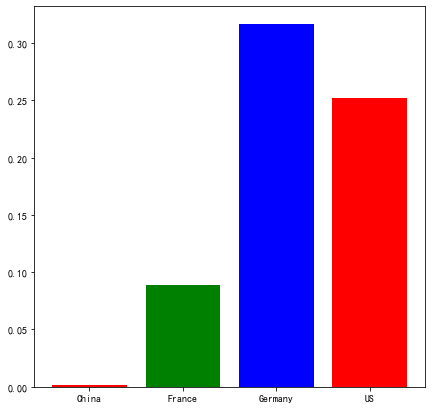

In [182]:
Chinese=1454727448
French=336138064
German=83779873
American=336138064
city_population=[Chinese,French,German,American]
result=[value/city_popu for value,city_popu in zip(values,city_population)]
# confresultratio=citys
# fig, ax = plt.subplots()
# wedges, labels, autopct = ax.pie(result,labels=city_list,colors=colors,
#                                   autopct='%1.1f%%', wedgeprops=dict(width=.2))

# # plt.pie(city_population,labels=city_list,autopct='%1.1f%%')#绘制饼图
# title='各国新冠疫情确诊人数在本国的占比对比'
# plt.title(title,fontsize=13)#绘制标题
# plt.setp(labels, fontsize=10)
# plt.savefig(f'./{title}')#保存图片
# plt.show()
plt.figure(figsize=(7,7))
plt.bar(city_list,result,color='rgb')
title='各国新冠疫情确诊人数在本国的占比对比'
plt.savefig(f'./img/{title}')#保存图片
plt.show()